# Notebook to show some predictions for the dataset EMOVO

In [1]:
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import tensorflow as tf

from IPython.display import Audio

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Load the model

In [3]:
# load the tensorflow model
model = tf.keras.models.load_model('models' +os.sep+ 'best_model.h5')
target_size = (450, 450)

labels = ['dis', 'gio', 'neu', 'pau', 'rab', 'sor', 'tri']
actors = ['f1', 'f2', 'f3', 'm1', 'm2', 'm3']

## Load a random audio file

In [4]:
# load a random audio file
actor = np.random.choice(actors)

path = 'audio' +os.sep+ actor +os.sep

audios = os.listdir(path)

file_name = np.random.choice(audios)
file = path + file_name

print('File:', file_name)
x, sr = librosa.load(file, sr=None)
Audio(file, rate=sr)

File: tri-f2-b1.wav


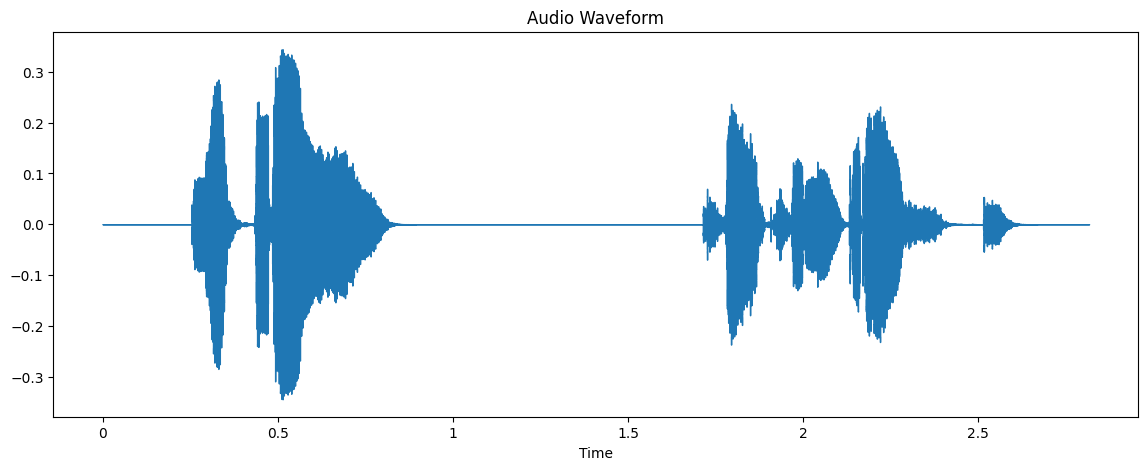

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.title('Audio Waveform')
plt.show()

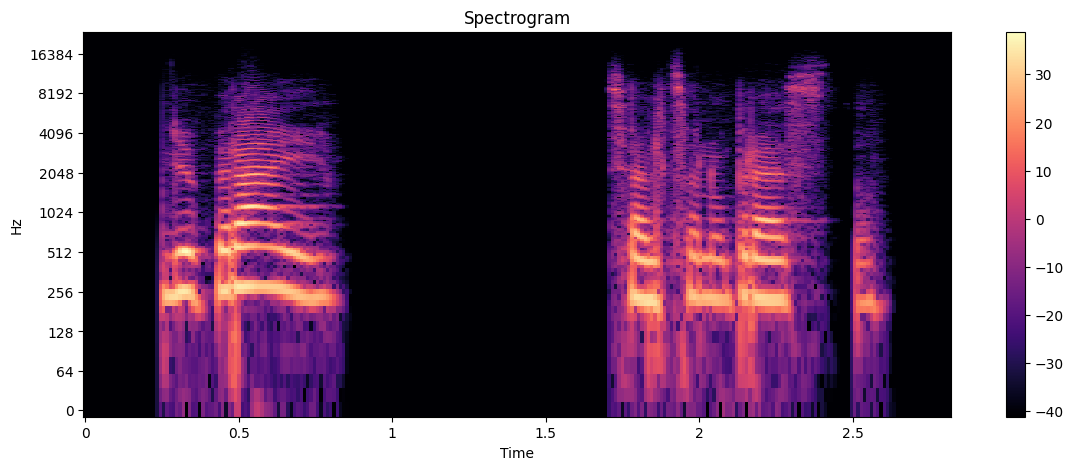

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectrogram')
plt.colorbar()
plt.show()

## Predict the emotion

In [7]:
image = tf.keras.utils.load_img('images' +os.sep+ file_name+'.png', target_size=target_size)

img_array = tf.keras.utils.img_to_array(image)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model(img_array)

# get the predicted class
predicted_class = labels[np.argmax(predictions[0])]
real_class = file_name.split('-')[0]

# print the prediction
print('File:', file_name)
print(f"Predicted sound:", predicted_class)
print("Actual sound:", real_class)
if predicted_class == real_class:
    print("*** Correct prediction! ***")

File: tri-f2-b1.wav
Predicted sound: tri
Actual sound: tri
*** Correct prediction! ***
